# Laboratory session 3

 Capettini Hilario (Matricola N. 2013031)

## Exercise 1

- The triangular distribution, in the interval (a, b), is given by the following:


$$ \begin{equation}
  f(X) =
    \begin{cases}
       \frac{2(x-a)}{(b-a)(c-a)} \hspace{1cm} a\leq x<c\\
       \frac{2(b-x)}{(b-a)(c-a)} \hspace{1cm} c\leq x \leq b\\
       0                        \hspace{6cm} \text{otherwise}
    \end{cases}       
\end{equation} $$

where $c \in [a, b]$.


In [1]:
library(GoFKernel)
library(showtext)
library(latex2exp)
showtext_auto()


Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009
Loading required package: sysfonts
Loading required package: showtextdb


###  plot the function, given the interval $(a, b)$


In [2]:
dex.1 <- function(x,a,b,c=(b-a)/2 + a) {
    # c is the middle point
     dex1 <- ifelse(x<a,
                    0,
                    ifelse(x<c,
                           2*(x-a)/((b-a)*(c-a)),
                           ifelse(x<b,
                                 2*(b-x)/((b-a)*(b-c)),
                                 0)))
     return(dex1)
      } 

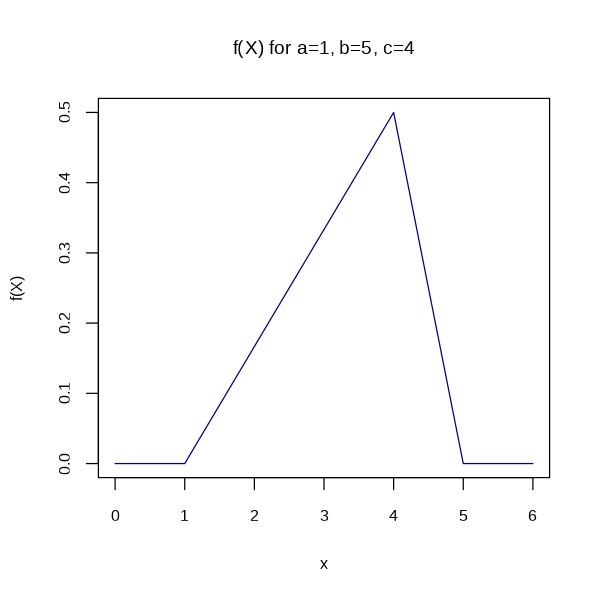

In [3]:
a <-1
b <-5
c <-4
x <- seq(a-1, b+1,0.05)                                     
pdf_ <- dex.1(x, a,b,c)

options(repr.plot.width=5,repr.plot.height=5)
               
plot(x,pdf_,type="l",
     main = TeX("$f(X)$ for $a=1$, $b=5$, $c=4$"),
     col = "navy",
     xlab ="x",
     ylab ="f(X)",)

### and write an algorithm to generate random numbers from the triangular distribution


The fastest method for this simple pdf was the accept/reject method of sampling

In [4]:
rex.1  <- function(n,a,b,c=(b-a)/2 + a){
    rex1 =c()
    for (i in c(1:10.e6)){
        rnx <-runif(1, min=a, max=b)
        rny <-runif(1, min=0, max=0.5)
        if (rny < dex.1(rnx,a,b,c)){
                 rex1 <-  c(rex1,rnx)
        }
        if (length(rex1)>=n){
            break
        }
    }
    return(rex1)}

### generate $10^4$ random number from the distribution, show them in an histogram and superimpose the analytical curve


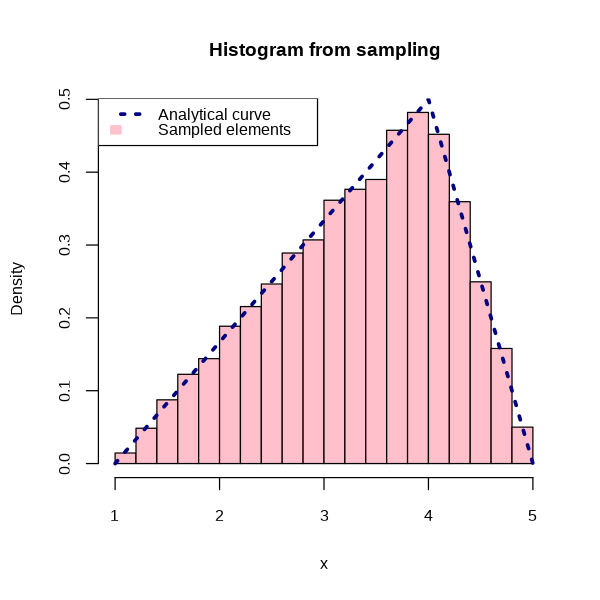

In [5]:
a <- 1.
b <- 5.
c <- 4.

samples <- rex.1(10000,a,b,c)

options(repr.plot.width=5,repr.plot.height=5)
hist(samples, breaks=20, freq=FALSE,
     col="pink",
     xlab="x",
     main="Histogram from sampling")

curve(dex.1(x, a,b,c),
      col="navy", lt=3, lw=3, add=TRUE,)

legend("topleft", legend = c("Analytical curve", "Sampled elements"),
       lt=3, lw=3,
       density=c(0,100),
       col = c("navy", NA),
       fill=c("navy", "pink"),
       border=c(NA,"pink"))

## Exercise 2 Markov’s inequality


- Markov’s inequality represents an upper bound to probability distributions:
$$P(X\geq k)\leq \frac{E[X]}{k} \text{ for } k>0$$


-  having defined a function
$$G(k) = F(k) \equiv P(X\geq k)$$


plot $G(k)$ and the Markov’s upper bound for:


In [6]:
library(showtext)
showtext_auto()
library(latex2exp)


### the exponential, Exp(λ = 1), distribution function


In [7]:
k <- seq(0,5, 0.05)
lambda <-1

media <- lambda

#G function definition
G <- 1-pexp(k, lambda)

#The markov inequality
markov <- media/k


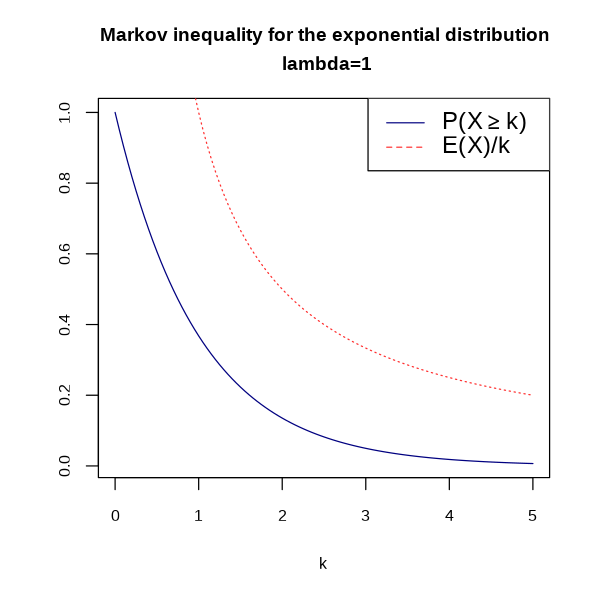

In [8]:
options(repr.plot.width=5,repr.plot.height=5)

plot(k,G,type="l",lty=1,
     col = "navy",
     main = paste("Markov inequality for the exponential distribution","\n","lambda=1"),
     xlab ="k",
     ylab ="",)

lines(k, markov,type="l",lty=3,
      col = "firebrick1")


legend("topright", c(TeX('$P(X\\geq k)$'),TeX('$E(X)/k$')),
       col = c("navy","firebrick1"), lty=1:3, cex=1.5)

###  the uniform, U (3, 5), distribution function


In [9]:
k <- seq(2.5,5.5, 0.05)

#G function definition
G <- 1-punif(k, 3,5)

expected_value <- 0.5*(5+3)
#Markov inequality
markov <- expected_value/k

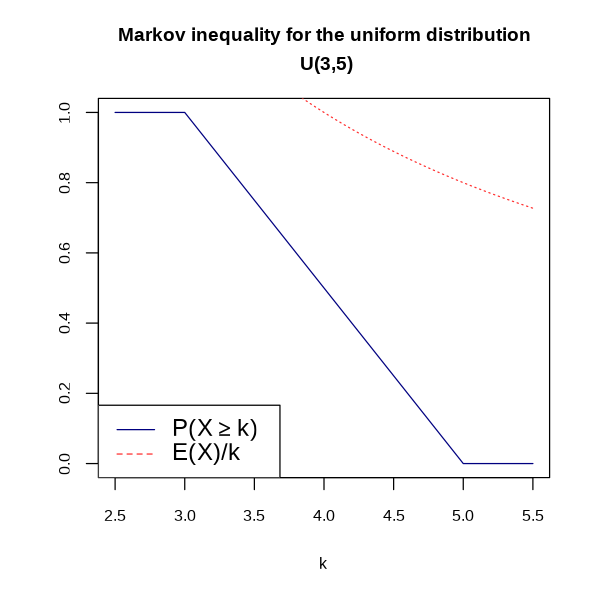

In [10]:
options(repr.plot.width=5,repr.plot.height=5)

plot(k,G,type="l",lty=1,
     col = "navy",
     main = paste("Markov inequality for the uniform distribution","\n","U(3,5)"),
     xlab ="k",
     ylab ="",)

lines(k, markov,type="l",lty=3,
      col = "firebrick1")


legend("bottomleft", c(TeX('$P(X\\geq k)$'),TeX('$E(X)/k$')),
       col = c("navy","firebrick1"), lty=1:3, cex=1.5)

###  the binomial, Bin(n = 1, p = 1/2), distribution function


In [11]:
k <- seq(0,100, 0.05)
n <- 1
p <- 0.5

#G function definition
G <- 1-pbinom(k, n,p)

expected_value <- n*p
#Markov inequality
markov <- expected_value/k

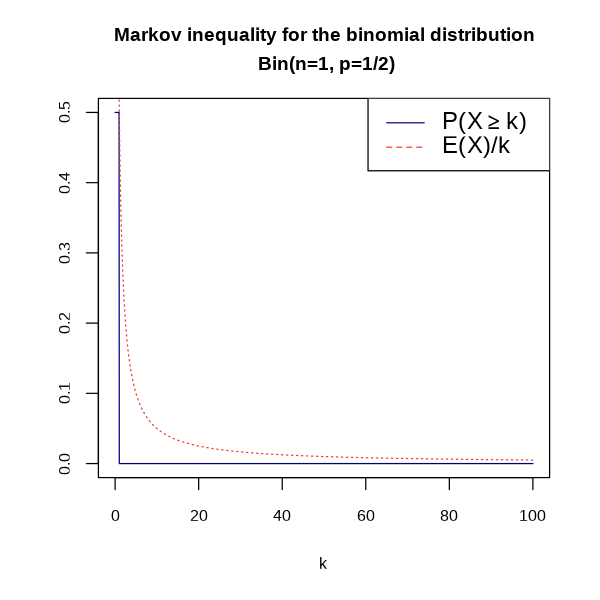

In [12]:
options(repr.plot.width=5,repr.plot.height=5)

plot(k,G,type="l",lty=1,
     col = "navy",
     main = paste("Markov inequality for the binomial distribution","\n","Bin(n=1, p=1/2)"),
     xlab ="k",
     ylab ="",)

lines(k, markov,type="l",lty=3,
      col = "firebrick1")


legend("topright", c(TeX('$P(X\\geq k)$'),TeX('$E(X)/k$')),
       col = c("navy","firebrick1"), lty=1:3, cex=1.5)
     
     

### a Poisson, Pois(λ = 1/2), distribution function


In [13]:
k <- seq(0,20, 0.001)
lambda <- 0.5

#G function definition
G <- 1-ppois(k, lambda)

expected_value <- lambda
#Markov inequality
markov <- expected_value/k

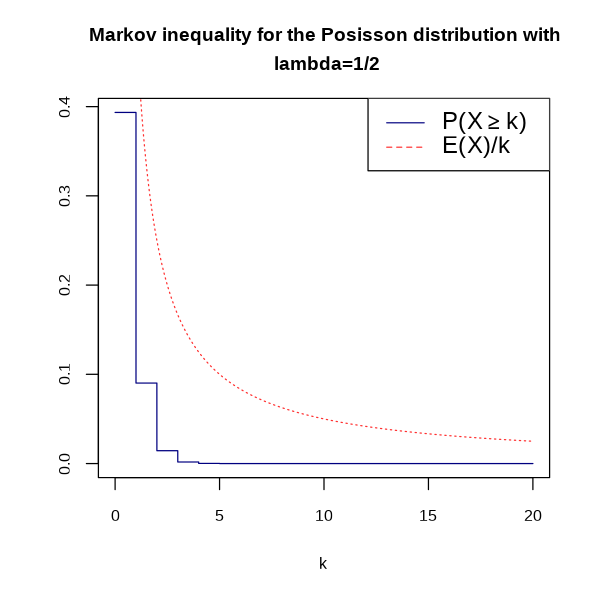

In [14]:
options(repr.plot.width=5,repr.plot.height=5)

plot(k,G,type="l",lty=1,
     col = "navy",
     main = paste("Markov inequality for the Posisson distribution with","\n","lambda=1/2"),
     xlab ="k",
     ylab ="",)

lines(k, markov,type="l",lty=3,
      col = "firebrick1")


legend("topright", c(TeX('$P(X\\geq k)$'),TeX('$E(X)/k$')),
       col = c("navy","firebrick1"), lty=1:3, cex=1.5)

## Exercise 3

- Chebyshev’s inequality tell us that

$$
P(|X-\mu| \geq k\sigma) \leq \frac{1}{k^2}
$$

- which can also be written as

$$
P(|X-\mu| < k\sigma) \geq 1-\frac{1}{k^2}
$$

-  use R to show, with a plot, that Chebyshev’s inequality is an upper bound to the following distributions:


### a normal distribution, $N(\mu=3, \sigma=5)$


In [15]:
k <- seq(0,12, 0.05)
mu <- 3
sigma <- 5
lambda <-1

#P function definition
P <- 1-(pnorm(mu + k * sigma,mu,sigma)- pnorm(mu - k * sigma,mu,sigma))

#The Chebyshev inequality
chebyshev <- 1/k**2

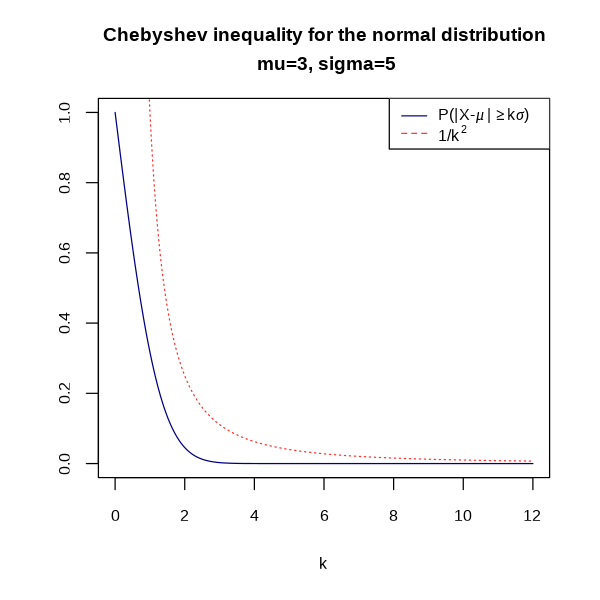

In [16]:
options(repr.plot.width=5,repr.plot.height=5)

plot(k,P,type="l",lty=1,
     col = "navy",
     main = paste("Chebyshev inequality for the normal distribution", "\n","mu=3, sigma=5"),
     xlab ="k",
     ylab ="",)

lines(k, chebyshev,type="l",lty=3,
      col = "firebrick1")


legend("topright", c(TeX('$P(| X-\\mu \\,| \\geq k \\sigma)$'),TeX('$1/k^2$')),
       col = c("navy","firebrick1"), lty=1:3, cex=1.)

### an exponential distribution, $e^{\lambda=1}$

In [17]:
k <- seq(0,5, 0.05)

lambda <-1
mu <- 1/lambda
sigma <- 1/lambda**2

#G function definition
P <- 1-(pexp(mu + k * sigma,lambda)- pexp(mu - k * sigma,lambda))

#The Chebyshev inequality
chebyshev <- 1/k**2

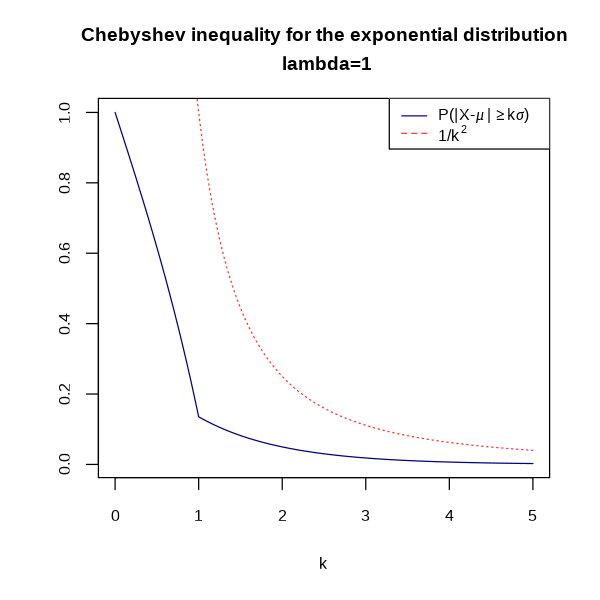

In [18]:
options(repr.plot.width=5,repr.plot.height=5)

plot(k,P,type="l",lty=1,
     col = "navy",
     main = paste("Chebyshev inequality for the exponential distribution", "\n","lambda=1"),
     xlab ="k",
     ylab ="",)

lines(k, chebyshev,type="l",lty=3,
      col = "firebrick1")


legend("topright", c(TeX('$P(| X-\\mu \\,| \\geq k \\sigma)$'),TeX('$1/k^2$')),
       col = c("navy","firebrick1"), lty=1:3, cex=1.)

### a uniform distribution $U(1-\sqrt{2},1+\sqrt{2})$

In [19]:
k <- seq(0,5, 0.05)

a <- 1-sqrt(2)
b <- 1+sqrt(2)

mu <- (a+b)/2
sigma <- (b-a)**2/12


#P function definition
P <- 1-(punif(mu + k * sigma, a,b)- punif(mu - k * sigma,a,b))

#The Chebyshev inequality
chebyshev <- 1/k**2

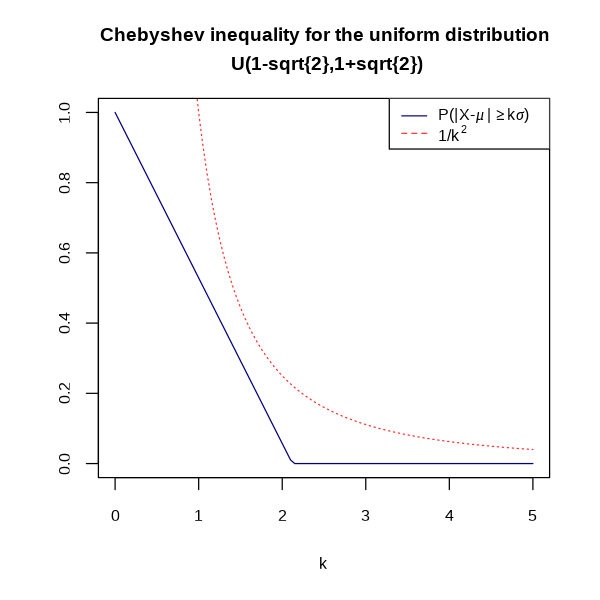

In [20]:
options(repr.plot.width=5,repr.plot.height=5)

plot(k,P,type="l",lty=1,
     col = "navy",
     main = paste("Chebyshev inequality for the uniform distribution", "\n","U(1-sqrt{2},1+sqrt{2})"),
     xlab ="k",
     ylab ="",)

lines(k, chebyshev,type="l",lty=3,
      col = "firebrick1")


legend("topright", c(TeX('$P(| X-\\mu \\,| \\geq k \\sigma)$'),TeX('$1/k^2$')),
       col = c("navy","firebrick1"), lty=1:3, cex=1.)

### a Poisson, $Poi(\lambda =1/3)$, distribution function

In [21]:
k <- seq(0,10, 0.05)

lambda <- 1/3

mu <- lambda
sigma <- sqrt(lambda)


#P function definition
P <- 1-(ppois(mu + k * sigma, lambda)- ppois(mu - k * sigma,lambda))

#The Chebyshev inequality
chebyshev <- 1/k**2

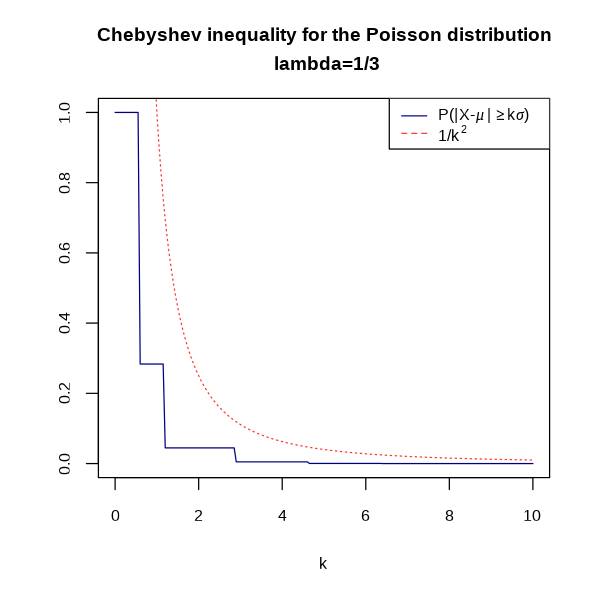

In [22]:
options(repr.plot.width=5,repr.plot.height=5)

plot(k,P,type="l",lty=1,
     col = "navy",
     main = paste("Chebyshev inequality for the Poisson distribution", "\n","lambda=1/3"),
     xlab ="k",
     ylab ="",)

lines(k, chebyshev,type="l",lty=3,
      col = "firebrick1")


legend("topright", c(TeX('$P(| X-\\mu \\,| \\geq k \\sigma)$'),TeX('$1/k^2$')),
       col = c("navy","firebrick1"), lty=1:3, cex=1.)

## Exercise 4

- Community Mobility Reports have been created with the aim to provide insights into what has changed in response to policies aimed at combating COVID-19. Data can be found at

    - https://www.google.com/covid19/mobility/

- Download and analyze the following data sets:

    - https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv

    and

    - https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip



The data show how visitors to (or time spent in) categorized places change compared to
baseline days. A baseline day represents a normal value for that day of the week. The
baseline day is the median value from the 5-week period Jan 3 – Feb 6, 2020.
To make the reports useful, categories have been used to group some of the places with
similar characteristics for purposes of social distancing guidance. The following categories
are available:

- retail and recreation, i.e. places like restaurants,cafes, shopping centers, theme parks,museums, libraries, and movie theaters


- grocery and pharmacy, i.e. grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies



- parks, i.e. national parks, public beaches, marinas, dog parks, plazas,and public gardens



- transit stations i.e. all public transport hubs such as subway, bus, and train stations



- workplaces, i.e. places of work
 



- residential, i.e. people’s residence




- Select a couple of European countries of your choice and analyze the trends in the previous variables over time:


    - produce a plot of the data by averaging the observable over a period of one week (hint: convert the data field to lubridate::week) and one month and quantify the impact of COVID-19 restrictions on mobility sitations.


In [23]:
library("tibble")
library("tidyverse")
library(showtext)
showtext_auto()


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.3     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [24]:
data_global <- read.csv("DATA/Global_Mobility_Report.csv",header=TRUE, sep=",")


In [25]:
#List of european countries to study
european_countries <- c("Italy","Germany","Spain","Finland")

In [26]:
#I filter the data to get the data of those 4 countries without regions
ec <- filter(data_global,country_region==european_countries) %>% filter(sub_region_1=="")
ec[1:5,]

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
DE,Germany,,,,,NA,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-16,7,10,9,6,-1,0
DE,Germany,,,,,NA,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-20,2,-1,14,3,-4,1
DE,Germany,,,,,NA,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-24,2,-5,17,-5,-20,4
DE,Germany,,,,,NA,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-02-28,3,11,9,-2,-5,2
DE,Germany,,,,,NA,ChIJa76xwh5ymkcRW-WRjmtd6HU,2020-03-03,0,5,8,-3,0,1


In [27]:
library("lubridate")


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [28]:
ec$week<-floor_date(as.Date(ec$date),unit ="week")  

In [29]:
# As the code tries to calculate the media over non numerical valus (Country names etc)
# I decided to supress thos warnings with suppressWarnings
cba_weekly <- suppressWarnings(aggregate(ec,
                by = list(ec$country_region,ec$week),
                FUN = mean))

In [30]:
#Now I remove the useles columns and rename the columns with the location and date for the plots

cba_weekly <- subset(cba_weekly,select=-c(3:11)) %>% 
              rename (Country=Group.1,Week=Group.2)

In [31]:
cba_weekly[1:5,]

Country,Week,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,week
Finland,2020-02-16,0.0,-0.5,-0.5,-8.0,-8.5,1.0,2020-02-16
Germany,2020-02-16,4.5,4.5,11.5,4.5,-2.5,0.5,2020-02-16
Italy,2020-02-16,1.0,2.0,23.0,6.0,0.5,-0.5,2020-02-16
Spain,2020-02-16,1.5,2.0,14.0,5.0,1.0,-1.5,2020-02-16
Finland,2020-02-23,5.0,2.0,40.0,-3.0,-12.0,1.0,2020-02-23


In [32]:
p1 <- ggplot(cba_weekly, aes(week, retail_and_recreation_percent_change_from_baseline, colour = Country, shape = Country)) +
       geom_line(size = 0.2)+ geom_point(size=0.7)+
       labs(title ="Retail and recreation")+
       ylab("%") + xlab("Date")

p2 <- ggplot(cba_weekly, aes(week, grocery_and_pharmacy_percent_change_from_baseline, colour = Country, shape = Country)) +
       geom_line(size = 0.2)+ geom_point(size=0.7)+
       labs(title ="Grocery and pharmacy")+
       ylab("%") + xlab("Date")

p3 <- ggplot(cba_weekly, aes(week, parks_percent_change_from_baseline, colour = Country, shape = Country)) +
       geom_line(size = 0.2)+ geom_point(size=0.7)+
       labs(title ="Parks")+
       ylab("%") + xlab("Date")

p4 <- ggplot(cba_weekly, aes(week, transit_stations_percent_change_from_baseline, colour = Country, shape = Country)) +
       geom_line(size = 0.2)+ geom_point(size=0.7)+
       labs(title ="Transit stations")+
       ylab("%") + xlab("Date")

p5 <- ggplot(cba_weekly, aes(week, workplaces_percent_change_from_baseline, colour = Country, shape = Country)) +
       geom_line(size = 0.2)+ geom_point(size=0.7)+
       labs(title ="Workplaces")+
       ylab("%") + xlab("Date")


p6 <- ggplot(cba_weekly, aes(week, residential_percent_change_from_baseline, colour = Country, shape = Country)) +
       geom_line(size = 0.2)+ geom_point(size=0.7)+
       labs(title ="Residential")+
       ylab("%") + xlab("Date")


In [33]:
#install.packages('patchwork')

In [34]:
#I use this package to put only one legend for th six plots
library(patchwork)

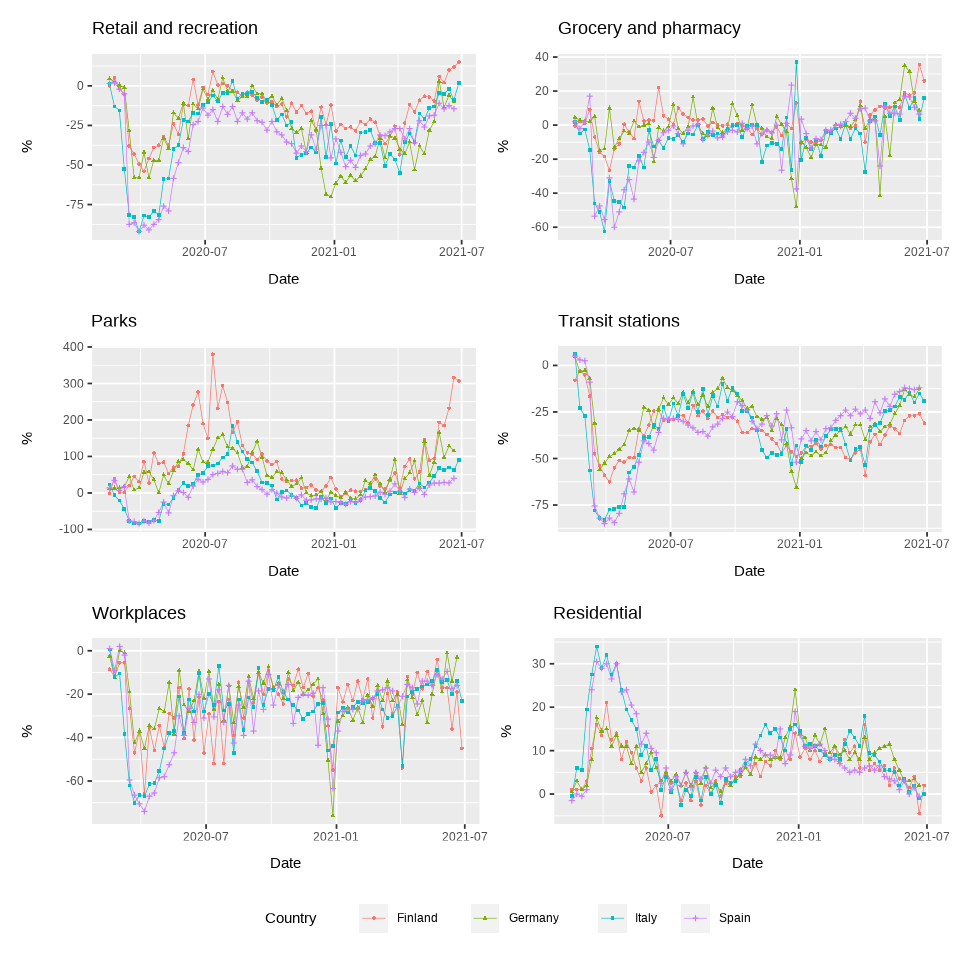

In [35]:
options(repr.plot.width=8,repr.plot.height=8)

combined <- (p1 | p2 )/(p3 | p4 )/(p5 | p6 )   & theme(legend.position = "bottom")
#Plot_layout is on charge of ploting only once the legends
combined + plot_layout(guides = "collect")

In [36]:
#Now we do the monthly analysis 
ec$month<-floor_date(as.Date(ec$date),unit ="month")  

In [37]:

cba_monthly <- suppressWarnings(aggregate(ec,
                by = list(ec$country_region,ec$month),
                FUN = mean)) 

In [38]:
cba_monthly <- subset(cba_monthly,select=-c(3:11)) %>% 
              rename (Country=Group.1,Month=Group.2)

In [39]:
p1 <- ggplot(cba_monthly, aes(Month, retail_and_recreation_percent_change_from_baseline, colour = Country, shape = Country)) +
       geom_line(size = 0.2)+ geom_point(size=0.7)+
       labs(title ="Retail and recreation")+
       ylab("%") + xlab("Date")

p2 <- ggplot(cba_monthly, aes(Month, grocery_and_pharmacy_percent_change_from_baseline, colour = Country, shape = Country)) +
       geom_line(size = 0.2)+ geom_point(size=0.7)+
       labs(title ="Grocery and pharmacy")+
       ylab("%") + xlab("Date")

p3 <- ggplot(cba_monthly, aes(Month, parks_percent_change_from_baseline, colour = Country, shape = Country)) +
       geom_line(size = 0.2)+ geom_point(size=0.7)+
       labs(title ="Parks")+
       ylab("%") + xlab("Date")

p4 <- ggplot(cba_monthly, aes(Month, transit_stations_percent_change_from_baseline, colour = Country, shape = Country)) +
       geom_line(size = 0.2)+ geom_point(size=0.7)+
       labs(title ="Transit stations")+
       ylab("%") + xlab("Date")

p5 <- ggplot(cba_monthly, aes(Month, workplaces_percent_change_from_baseline, colour = Country, shape = Country)) +
       geom_line(size = 0.2)+ geom_point(size=0.7)+
       labs(title ="Workplaces")+
       ylab("%") + xlab("Date")


p6 <- ggplot(cba_monthly, aes(Month, residential_percent_change_from_baseline, colour = Country, shape = Country)) +
       geom_line(size = 0.2)+ geom_point(size=0.7)+
       labs(title ="Residential")+
       ylab("%") + xlab("Date")

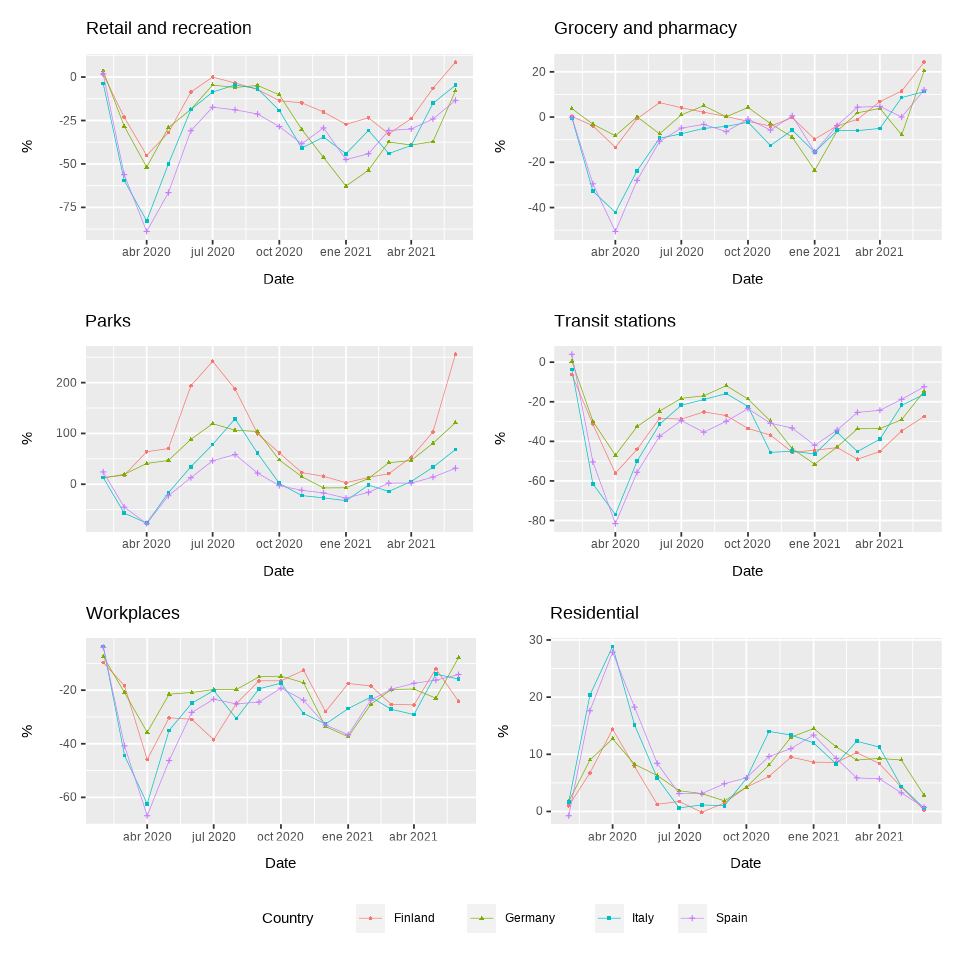

In [40]:
options(repr.plot.width=8,repr.plot.height=8)

combined <- (p1 | p2 )/(p3 | p4 )/(p5 | p6 )   & theme(legend.position = "bottom")
#Plot_layout is on charge of ploting only once the legends
combined + plot_layout(guides = "collect")